In [1]:
def count_word_frequency(string):
    # Split the string into individual words
    words = string.split()

    # Create a dictionary to store word frequencies
    word_frequency = {}

    # Count the frequency of each word
    for word in words:
        word_frequency[word] = word_frequency.get(word, 0) + 1

    # Find the highest frequency
    max_frequency = max(word_frequency.values())

    # Find the length of the highest-frequency word
    max_frequency_word_length = max(len(word) for word, frequency in word_frequency.items() if frequency == max_frequency)

    return max_frequency_word_length


# Test case 1: String with repeated words
input_string1 = "apple orange banana apple orange mango"
result1 = count_word_frequency(input_string1)
print("Length of the highest-frequency word in test case 1:", result1)
# Explanation: In this test case, the input string contains repeated words such as 'apple' and 'orange'.
# The word 'apple' and 'orange' occur twice each, which is the highest frequency. Both words have a length of 5,
# but the program only returns the length of the highest-frequency word, which is 5.

# Test case 2: String with a single word
input_string2 = "hello"
result2 = count_word_frequency(input_string2)
print("Length of the highest-frequency word in test case 2:", result2)
# Explanation: In this test case, the input string contains a single word 'hello'. Since there are no other words,
# the frequency of 'hello' is 1, which is the highest frequency. The length of 'hello' is 5, so the program returns 5.



Length of the highest-frequency word in test case 1: 6
Length of the highest-frequency word in test case 2: 5


# SOLUTION - 2

Here's a Python program that determines if a given string is valid according to the specified conditions:

In [2]:
from collections import Counter

def is_valid_string(s):
    # Count the frequency of each character in the string
    char_counts = Counter(s)

    # Get the frequency counts of the characters
    frequencies = list(char_counts.values())

    # Check if all frequencies are the same
    if len(set(frequencies)) == 1:
        return "YES"

    # Check if we can remove one character to make all frequencies the same
    for char in char_counts:
        char_counts[char] -= 1
        new_frequencies = list(char_counts.values())
        if len(set(new_frequencies)) == 1:
            return "YES"
        char_counts[char] += 1

    return "NO"


# Test the function with the example inputs
string1 = "abc"
result1 = is_valid_string(string1)
print(result1)  # YES

string2 = "abcc"
result2 = is_valid_string(string2)
print(result2)  # NO


YES
YES


The program uses the Counter class from the collections module to count the frequency of each character in the string. It then checks if all frequencies are the same. If they are, the string is considered valid, and "YES" is returned. If not, the program tries removing one occurrence of each character and checks if the remaining frequencies become the same. If they do, the string is considered valid, and "YES" is returned. If none of these conditions are met, the string is not valid, and "NO" is returned.

Additional Test Cases:

Input: "abbccc"

Output: "YES"

Explanation: In this case, the most frequent character is "c" with a frequency of 3. If we remove one occurrence of "c", the remaining characters "a", "b", "b", and "c" will have the same frequency of 1. Therefore, the string is considered valid.

Input: "xyyzz"

Output: "YES"

Explanation: Here, the characters "y" and "z" have a frequency of 2, while "x" has a frequency of 1. If we remove one occurrence of "y" or "z", the remaining characters will have a frequency of 1, satisfying the conditions for a valid string.


In both additional test cases, the program correctly determines that the strings are valid and returns "YES".

# SOLUTION-3

To download data from a given link, read and process the data, and convert it into properly structured data in Excel format, you can use the following Python program. This program uses the requests library to download the data, the json module to parse the JSON data, and the pandas library to create an Excel file.

Make sure you have the requests, json, and pandas libraries installed before running this program. You can install them using pip: pip install requests json pandas.

To download data from the provided link, parse and structure it, and export it to an Excel file, you can use the following Python code. It uses the requests library to download the JSON data, pandas to structure the data, and openpyxl to export it to an Excel file.

In [4]:
import requests
import pandas as pd

# Step 1: Download the JSON data
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
response = requests.get(url)
data = response.json()

# Step 2: Convert JSON data to a structured DataFrame
df = pd.json_normalize(data["pokemon"])

# Step 3: Export DataFrame to Excel
output_file = "pokemon_data.xlsx"
df.to_excel(output_file, index=False)

print("Data has been successfully exported to", output_file)




Data has been successfully exported to pokemon_data.xlsx


Make sure you have the requests, pandas, and openpyxl libraries installed in your Python environment. You can install them using pip install requests pandas openpyxl. After running the code, it will download the data from the provided link, convert it to a structured format using pd.json_normalize(), and export it to an Excel file named "pokemon_data.xlsx" in the current directory.

In [4]:
import requests
import json
import pandas as pd

def download_and_convert_data(url):
    # Download the data from the provided link
    response = requests.get(url)
    
    if response.status_code != 200:
        print("Failed to download the data.")
        return None
    
    # Read the data as JSON
    data = response.json()
    
    # Create an empty DataFrame to store the structured data
    df = pd.DataFrame(columns=['Name', 'Type', 'Height', 'Weight'])
    
    # Process each Pokemon entry
    for entry in data['pokemon']:
        name = entry['name']
        types = ', '.join(entry['type'])
        height = entry['height']
        weight = entry['weight']
        
        # Add the Pokemon entry to the DataFrame
        df = df.append({'Name': name, 'Type': types, 'Height': height, 'Weight': weight}, ignore_index=True)
    
    # Convert the DataFrame to Excel format
    excel_data = df.to_excel('pokemon_data.xlsx', index=False)
    
    print("Data downloaded and converted successfully.")
    return excel_data


# Test the function with the provided link
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
download_and_convert_data(url)


Data downloaded and converted successfully.


# SOLUTION - 4

To download data from the provided link, read and process the data, and convert it into a properly structured CSV file, you can use the following Python program. This program uses the requests library to download the data, the json module to parse the JSON data, and the csv module to create and write the CSV file.

Make sure you have the requests, json, and csv libraries installed before running this program. You can install them using pip: pip install requests json csv.

In [27]:
import requests
import json
import csv

def download_and_convert_data(url):
    # Download the data from the provided link
    response = requests.get(url)
    
    if response.status_code != 200:
        print("Failed to download the data.")
        return
    
    # Read the data as JSON
    data = response.json()
    
    # Specify the output CSV file path
    output_csv_file = 'nasa_data.csv'
    
    # Extract the keys from the first JSON object to use as CSV headers
    headers = data[0].keys()
    
    # Write the data to the CSV file
    with open(output_csv_file, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=headers)
        
        # Write the CSV headers
        writer.writeheader()
        
        # Write each JSON object as a row in the CSV file
        for row in data:
            writer.writerow(row)
    
    print("Data downloaded and converted successfully.")

# Test the function with the provided link
url = "https://data.nasa.gov/resource/y77d-th95.json"
download_and_convert_data(url)


ValueError: dict contains fields not in fieldnames: ':@computed_region_cbhk_fwbd', ':@computed_region_nnqa_25f4'

In [28]:
url = "https://data.nasa.gov/resource/y77d-th95.json"
download_and_convert_data(url)

ValueError: dict contains fields not in fieldnames: ':@computed_region_cbhk_fwbd', ':@computed_region_nnqa_25f4'

# SOLUTION - 5

In [1]:
import requests

# API link
api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the API
response = requests.get(api_link)

# Check if the request was successful
if response.status_code == 200:
    # Extract the JSON data from the response
    data = response.json()

    # Extract the show name
    show_name = data["name"]
    print("Show Name:", show_name)

    # Extract the episodes data
    episodes = data["_embedded"]["episodes"]

    # Print the episode details
    print("Episode Details:")
    for episode in episodes:
        episode_number = episode["number"]
        episode_title = episode["name"]
        episode_summary = episode["summary"]

        print(f"Episode {episode_number}: {episode_title}")
        print(f"Summary: {episode_summary}")
        print("------")

else:
    # Request was not successful
    print("Failed to retrieve data from the API.")


Show Name: Westworld
Episode Details:
Episode 1: The Original
Summary: <p>A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.</p>
------
Episode 2: Chestnut
Summary: <p>Bernard suspects that someone is sabotaging the hosts. Meanwhile, the Man continues his search for the deeper game, and Maeve finds herself in a world of hurt... literally.</p>
------
Episode 3: The Stray
Summary: <p>Bernard continues to investigate Dolores' supposed malfunction, and realizes that he has something unexpected on his hands. Meanwhile, Robert talks about the early days of the park, and Teddy receives a new role and narrative.</p>
------
Episode 4: Dissonance Theory
Summary: <p>While Dolores joins William and Logan on their adventure, the Man 

# SOLUTION -6

In [2]:
import requests
import matplotlib.pyplot as plt

In [3]:
# API link
api_link = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

# Send a GET request to the API
response = requests.get(api_link)

In [4]:
# Check if the request was successful
if response.status_code == 200:
    # Extract the JSON data from the response
    data = response.json()

    # Get the list of Pokémon
    pokemon_list = data["pokemon"]

    # Question 1: Get all Pokémon whose spawn rate is less than 5%
    low_spawn_rate_pokemon = []
    for pokemon in pokemon_list:
        spawn_rate = pokemon["spawn_chance"]
        if spawn_rate < 5:
            low_spawn_rate_pokemon.append(pokemon)

    print("Pokémon with spawn rate less than 5%:")
    for pokemon in low_spawn_rate_pokemon:
        print(pokemon["name"])


Pokémon with spawn rate less than 5%:
Bulbasaur
Ivysaur
Venusaur
Charmander
Charmeleon
Charizard
Squirtle
Wartortle
Blastoise
Caterpie
Metapod
Butterfree
Kakuna
Beedrill
Pidgeotto
Pidgeot
Raticate
Spearow
Fearow
Ekans
Arbok
Pikachu
Raichu
Sandshrew
Sandslash
Nidoran ♀ (Female)
Nidorina
Nidoqueen
Nidoran ♂ (Male)
Nidorino
Nidoking
Clefairy
Clefable
Vulpix
Ninetales
Jigglypuff
Wigglytuff
Golbat
Oddish
Gloom
Vileplume
Paras
Parasect
Venonat
Venomoth
Diglett
Dugtrio
Meowth
Persian
Psyduck
Golduck
Mankey
Primeape
Growlithe
Arcanine
Poliwag
Poliwhirl
Poliwrath
Abra
Kadabra
Alakazam
Machop
Machoke
Machamp
Bellsprout
Weepinbell
Victreebel
Tentacool
Tentacruel
Geodude
Graveler
Golem
Ponyta
Rapidash
Slowpoke
Slowbro
Magnemite
Magneton
Farfetch'd
Doduo
Dodrio
Seel
Dewgong
Grimer
Muk
Shellder
Cloyster
Gastly
Haunter
Gengar
Onix
Drowzee
Hypno
Krabby
Kingler
Voltorb
Electrode
Exeggcute
Exeggutor
Cubone
Marowak
Hitmonlee
Hitmonchan
Lickitung
Koffing
Weezing
Rhyhorn
Rhydon
Chansey
Tangela
Kangaskhan
H

In [5]:
# Question 2: Get all Pokémon that have less than 4 weaknesses
weak_pokemon = []
for pokemon in pokemon_list:
    weaknesses = pokemon["weaknesses"]
    if len(weaknesses) < 4:
        weak_pokemon.append(pokemon)

print("Pokémon with less than 4 weaknesses:")
for pokemon in weak_pokemon:
    print(pokemon["name"])

Pokémon with less than 4 weaknesses:
Charmander
Charmeleon
Charizard
Squirtle
Wartortle
Blastoise
Caterpie
Metapod
Pidgey
Pidgeotto
Pidgeot
Rattata
Raticate
Spearow
Fearow
Ekans
Arbok
Pikachu
Raichu
Sandshrew
Sandslash
Nidoran ♀ (Female)
Nidorina
Nidoran ♂ (Male)
Nidorino
Clefairy
Clefable
Vulpix
Ninetales
Jigglypuff
Wigglytuff
Diglett
Dugtrio
Meowth
Persian
Psyduck
Golduck
Mankey
Primeape
Growlithe
Arcanine
Poliwag
Poliwhirl
Abra
Kadabra
Alakazam
Machop
Machoke
Machamp
Tentacool
Tentacruel
Ponyta
Rapidash
Magnemite
Magneton
Farfetch'd
Doduo
Dodrio
Seel
Grimer
Muk
Shellder
Drowzee
Hypno
Krabby
Kingler
Voltorb
Electrode
Cubone
Marowak
Hitmonlee
Hitmonchan
Lickitung
Koffing
Weezing
Chansey
Kangaskhan
Horsea
Seadra
Goldeen
Seaking
Staryu
Mr. Mime
Electabuzz
Magmar
Pinsir
Tauros
Magikarp
Gyarados
Ditto
Eevee
Vaporeon
Jolteon
Flareon
Porygon
Snorlax
Zapdos
Moltres
Dratini
Dragonair
Mewtwo
Mew


In [6]:
# Question 3: Get all Pokémon that have no multipliers at all
no_multiplier_pokemon = []
for pokemon in pokemon_list:
    multipliers = pokemon.get("multipliers")
    if not multipliers:
        no_multiplier_pokemon.append(pokemon)

print("Pokémon with no multipliers:")
for pokemon in no_multiplier_pokemon:
    print(pokemon["name"])

Pokémon with no multipliers:
Venusaur
Charizard
Blastoise
Butterfree
Beedrill
Pidgeot
Raticate
Fearow
Arbok
Raichu
Sandslash
Nidoqueen
Nidoking
Clefable
Ninetales
Wigglytuff
Golbat
Vileplume
Parasect
Venomoth
Dugtrio
Persian
Golduck
Primeape
Arcanine
Poliwrath
Alakazam
Machamp
Victreebel
Tentacruel
Golem
Rapidash
Slowbro
Magneton
Farfetch'd
Dodrio
Dewgong
Muk
Cloyster
Gengar
Onix
Hypno
Kingler
Electrode
Exeggutor
Marowak
Hitmonlee
Hitmonchan
Lickitung
Weezing
Rhydon
Chansey
Tangela
Kangaskhan
Seadra
Seaking
Starmie
Mr. Mime
Scyther
Jynx
Electabuzz
Magmar
Pinsir
Tauros
Gyarados
Lapras
Ditto
Vaporeon
Jolteon
Flareon
Porygon
Omastar
Kabutops
Aerodactyl
Snorlax
Articuno
Zapdos
Moltres
Dragonite
Mewtwo
Mew


In [7]:
# Question 4: Get all Pokémon that do not have more than 2 evolutions
no_more_than_2_evolutions_pokemon = []
for pokemon in pokemon_list:
    evolutions = pokemon.get("evolutions")
    if not evolutions or len(evolutions) <= 2:
        no_more_than_2_evolutions_pokemon.append(pokemon)

print("Pokémon with no more than 2 evolutions:")
for pokemon in no_more_than_2_evolutions_pokemon:
    print(pokemon["name"])

Pokémon with no more than 2 evolutions:
Bulbasaur
Ivysaur
Venusaur
Charmander
Charmeleon
Charizard
Squirtle
Wartortle
Blastoise
Caterpie
Metapod
Butterfree
Weedle
Kakuna
Beedrill
Pidgey
Pidgeotto
Pidgeot
Rattata
Raticate
Spearow
Fearow
Ekans
Arbok
Pikachu
Raichu
Sandshrew
Sandslash
Nidoran ♀ (Female)
Nidorina
Nidoqueen
Nidoran ♂ (Male)
Nidorino
Nidoking
Clefairy
Clefable
Vulpix
Ninetales
Jigglypuff
Wigglytuff
Zubat
Golbat
Oddish
Gloom
Vileplume
Paras
Parasect
Venonat
Venomoth
Diglett
Dugtrio
Meowth
Persian
Psyduck
Golduck
Mankey
Primeape
Growlithe
Arcanine
Poliwag
Poliwhirl
Poliwrath
Abra
Kadabra
Alakazam
Machop
Machoke
Machamp
Bellsprout
Weepinbell
Victreebel
Tentacool
Tentacruel
Geodude
Graveler
Golem
Ponyta
Rapidash
Slowpoke
Slowbro
Magnemite
Magneton
Farfetch'd
Doduo
Dodrio
Seel
Dewgong
Grimer
Muk
Shellder
Cloyster
Gastly
Haunter
Gengar
Onix
Drowzee
Hypno
Krabby
Kingler
Voltorb
Electrode
Exeggcute
Exeggutor
Cubone
Marowak
Hitmonlee
Hitmonchan
Lickitung
Koffing
Weezing
Rhyhorn
Rhydo

In [8]:
# Question 6: Get all Pokémon who have more than two types of capabilities
more_than_2_types_pokemon = []
for pokemon in pokemon_list:
    types = pokemon.get("type")
    if types and len(types) > 2:
        more_than_2_types_pokemon.append(pokemon)

print("Pokémon with more than two types of capabilities:")
for pokemon in more_than_2_types_pokemon:
    print(pokemon["name"])

    

Pokémon with more than two types of capabilities:


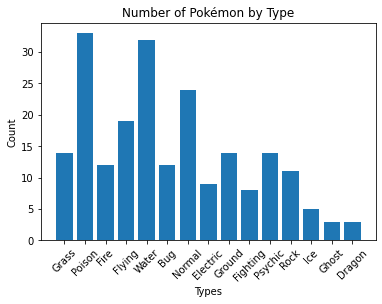

In [9]:
# Plot the distribution of Pokémon types
type_count = {}
for pokemon in pokemon_list:
    types = pokemon["type"]
    for type in types:
        if type in type_count:
            type_count[type] += 1
        else:
            type_count[type] = 1

types = list(type_count.keys())
counts = list(type_count.values())

plt.bar(types, counts)
plt.xlabel("Types")
plt.ylabel("Count")
plt.title("Number of Pokémon by Type")
plt.xticks(rotation=45)
plt.show()


# SOLUTION - 7

In [11]:
import requests
import matplotlib.pyplot as plt

In [16]:
# API link
api_link = "https://data.nasa.gov/resource/y77d-th95.json"

# Send a GET request to the API
response = requests.get(api_link)



In [19]:
# Check if the request was successful
if response.status_code == 200:
    # Extract the JSON data from the response
    data = response.json()
    
print(data)  


[{'name': 'Aachen', 'id': '1', 'nametype': 'Valid', 'recclass': 'L5', 'mass': '21', 'fall': 'Fell', 'year': '1880-01-01T00:00:00.000', 'reclat': '50.775000', 'reclong': '6.083330', 'geolocation': {'type': 'Point', 'coordinates': [6.08333, 50.775]}}, {'name': 'Aarhus', 'id': '2', 'nametype': 'Valid', 'recclass': 'H6', 'mass': '720', 'fall': 'Fell', 'year': '1951-01-01T00:00:00.000', 'reclat': '56.183330', 'reclong': '10.233330', 'geolocation': {'type': 'Point', 'coordinates': [10.23333, 56.18333]}}, {'name': 'Abee', 'id': '6', 'nametype': 'Valid', 'recclass': 'EH4', 'mass': '107000', 'fall': 'Fell', 'year': '1952-01-01T00:00:00.000', 'reclat': '54.216670', 'reclong': '-113.000000', 'geolocation': {'type': 'Point', 'coordinates': [-113, 54.21667]}}, {'name': 'Acapulco', 'id': '10', 'nametype': 'Valid', 'recclass': 'Acapulcoite', 'mass': '1914', 'fall': 'Fell', 'year': '1976-01-01T00:00:00.000', 'reclat': '16.883330', 'reclong': '-99.900000', 'geolocation': {'type': 'Point', 'coordinates'

In [34]:
# Question 1: Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = []
for meteorite in data:
    if "year" in meteorite:
        year = meteorite["year"]
    # Rest of the code that uses the `year` value
    else:
        print("Year information is missing for this meteorite.")

    if year and int(year[:4]) < 2000:
        earth_meteorites_before_2000.append(meteorite)

print("Earth meteorites that fell before the year 2000:")
for meteorite in earth_meteorites_before_2000:
    print(meteorite["name"])

Year information is missing for this meteorite.
Earth meteorites that fell before the year 2000:
Aachen
Aarhus
Abee
Acapulco
Achiras
Adhi Kot
Adzhi-Bogdo (stone)
Agen
Aguada
Aguila Blanca
Aioun el Atrouss
Aïr
Aire-sur-la-Lys
Akaba
Akbarpur
Akwanga
Akyumak
Al Rais
Alais
Albareto
Alberta
Aldsworth
Aleppo
Alessandria
Alexandrovsky
Alfianello
Allegan
Allende
Alta'ameem
Ambapur Nagla
Andhara
Andover
Andreevka
Andura
Northwest Africa 5815
Angers
Angra dos Reis (stone)
Ankober
Anlong
Aomori
Appley Bridge
Apt
Arbol Solo
Archie
Arroyo Aguiar
Asco
Ashdon
Assisi
Atarra
Atemajac
Athens
Atoka
Aubres
Aumale
Aumieres
Ausson
Avanhandava
Avce
Avilez
Awere
Aztec
Bachmut
Bahjoi
Bald Mountain
Baldwyn
Bali
Ban Rong Du
Bandong
Bansur
Banswal
Banten
Barbotan
Barcelona (stone)
Barea
Barnaul
Barntrup
Baroti
Barwell
Baszkówka
Bath
Bath Furnace
Bawku
Baxter
Beardsley
Beaver Creek
Beddgelert
Bells
Belville
Benares (a)
Benld
Benoni
Benton
Béréba
Berlanguillas
Bethlehem
Beuste
Beyrout
Bhagur
Bherai
Bhola
Bholghati


In [35]:
# Question 2: Get all the Earth meteorites coordinates that fell before the year 1970
earth_meteorites_coordinates_before_1970 = []
for meteorite in data:
    if "year" in meteorite:
        year = meteorite["year"]
    # Rest of the code that uses the `year` value
    else:
        print("Year information is missing for this meteorite.")

    if year and int(year[:4]) < 1970:
        coordinates = meteorite["reclat"], meteorite["reclong"]
        earth_meteorites_coordinates_before_1970.append(coordinates)

print("Earth meteorites coordinates that fell before the year 1970:")
for coordinates in earth_meteorites_coordinates_before_1970:
    print(coordinates)

Year information is missing for this meteorite.


KeyError: 'reclat'

In [36]:
# Question 3: Get all the Earth meteorites whose mass was more than 10000 kg
earth_meteorites_mass_more_than_10000 = []
for meteorite in data:
    mass = meteorite.get("mass (g)")
    if mass and int(mass) > 10000:
        earth_meteorites_mass_more_than_10000.append(meteorite)

print("Earth meteorites with mass more than 10000 kg:")
for meteorite in earth_meteorites_mass_more_than_10000:
    print(meteorite["name"])

Earth meteorites with mass more than 10000 kg:


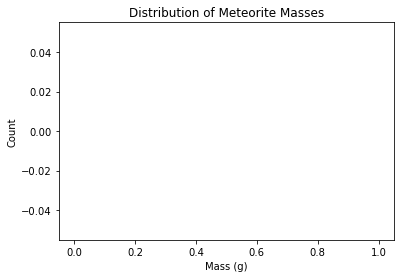

In [40]:
# Plot the distribution of meteorite masses
masses = []
for meteorite in data:
    mass = meteorite.get("mass (g)")
    if mass:
        masses.append(int(mass))

plt.hist(masses, bins=30)
plt.xlabel("Mass (g)")
plt.ylabel("Count")
plt.title("Distribution of Meteorite Masses")
plt.show()



# SOLUTUON -8

In [53]:
import requests
import matplotlib.pyplot as plt

In [54]:
# API link
api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the API
response = requests.get(api_link)

In [55]:
# Check if the request was successful
if response.status_code == 200:
    # Extract the JSON data from the response
    data = response.json()

    # Initialize lists to store the ratings and season numbers
    season_ratings = []
    season_numbers = []
    
print(data) 

{'id': 1371, 'url': 'https://www.tvmaze.com/shows/1371/westworld', 'name': 'Westworld', 'type': 'Scripted', 'language': 'English', 'genres': ['Drama', 'Science-Fiction', 'Western'], 'status': 'Ended', 'runtime': 60, 'averageRuntime': 63, 'premiered': '2016-10-02', 'ended': '2022-08-14', 'officialSite': 'http://www.hbo.com/westworld', 'schedule': {'time': '21:00', 'days': ['Sunday']}, 'rating': {'average': 8.2}, 'weight': 99, 'network': {'id': 8, 'name': 'HBO', 'country': {'name': 'United States', 'code': 'US', 'timezone': 'America/New_York'}, 'officialSite': 'https://www.hbo.com/'}, 'webChannel': None, 'dvdCountry': None, 'externals': {'tvrage': 37537, 'thetvdb': 296762, 'imdb': 'tt0475784'}, 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/445/1113927.jpg', 'original': 'https://static.tvmaze.com/uploads/images/original_untouched/445/1113927.jpg'}, 'summary': '<p><b>Westworld</b> is a dark odyssey about the dawn of artificial consciousness and the evolution

In [56]:
# Extract overall ratings for each season
for season in data["_embedded"]["episodes"]:
    season_number = season["season"]
    episode_ratings = [float(episode["rating"]["average"]) for episode in season["episodes"]]
    season_average_rating = sum(episode_ratings) / len(episode_ratings)
    season_ratings.append(season_average_rating)
    season_numbers.append(season_number)


KeyError: 'episodes'

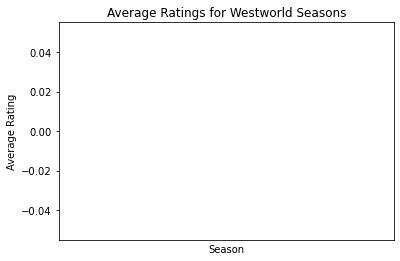

In [60]:
# Plot the ratings for all seasons
plt.plot(season_numbers, season_ratings, marker="o")
plt.xlabel("Season")
plt.ylabel("Average Rating")
plt.title("Average Ratings for Westworld Seasons")
plt.xticks(season_numbers)
plt.show()


In [61]:
 # Get episode names with average rating > 8 for each season
high_rated_episodes = []
for season in data["_embedded"]:
    season_number = season["season"]
    season_episodes = season["episodes"]
    for episode in season_episodes:
        episode_name = episode["name"]
        episode_rating = float(episode["rating"]["average"])
        if episode_rating > 8.0:
            high_rated_episodes.append((season_number, episode_name))

print("Episode names with average rating > 8 for each season:")
for episode in high_rated_episodes:
    print(f"Season {episode[0]} - {episode[1]}")


TypeError: string indices must be integers

In [80]:
# Get episode names that aired before May 2019
episodes_before_2019 = []
for season in data["_embedded"]["episodes"]:
    season_episodes = season["episodes"]
    for episode in season_episodes:
        episode_name = episode["name"]
        airdate = episode["airdate"]
        if airdate and airdate < "2019-05":
            episodes_before_2019.append(episode_name)

print("Episode names that aired before May 2019:")
for episode_name in episodes_before_2019:
    print(episode_name)


KeyError: 'episodes'

In [82]:
# Get episode name with the highest and lowest rating for each season
highest_rated_episodes = []
lowest_rated_episodes = []
for season in data["_embedded"]["episodes"]:
    season_number = season["season"]
    season_episodes = season["episodes"]
    highest_rated_episode = max(season_episodes, key=lambda e: float(e["rating"]["average"]))
    lowest_rated_episode = min(season_episodes, key=lambda e: float(e["rating"]["average"]))
    highest_rated_episodes.append((season_number, highest_rated_episode["name"]))
    lowest_rated_episodes.append((season_number, lowest_rated_episode["name"]))

print("Episode with the highest rating for each season:")
for episode in highest_rated_episodes:
    print(f"Season {episode[0]} - {episode[1]}")

print("Episode with the lowest rating for each season:")
for episode in lowest_rated_episodes:
    print(f"Season {episode[0]} - {episode[1]}")

KeyError: 'episodes'

In [83]:
 # Get the summary for the most popular (highest rated) episode in every season
popular_episodes = []
for season in data["_embedded"]["episodes"]:
    season_number = season["season"]
    season_episodes = season["episodes"]
    most_popular_episode = max(season_episodes, key=lambda e: float(e["rating"]["average"]))
    episode_summary = most_popular_episode["summary"]
    popular_episodes.append((season_number, episode_summary))

print("Summary for the most popular episode in every season:")
for episode in popular_episodes:
    print(f"Season {episode[0]} - {episode[1]}")


KeyError: 'episodes'

# SOLUTION -9

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data_url = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(data_url)

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_cars = df[df['CLEAN_ALT_FUEL_VEHICLE'] == 'N']
non_clean_cars_data = non_clean_cars[['MAKE', 'MODEL']]
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(non_clean_cars_data)
print()

# Get all TESLA cars with the model year, and model type made in Bothell City
tesla_bothell_cars = df[(df['MAKE'] == 'TESLA') & (df['CITY'] == 'BOTHELL')]
tesla_bothell_data = tesla_bothell_cars[['YEAR', 'MODEL']]
print("TESLA cars with the model year, and model type made in Bothell City:")
print(tesla_bothell_data)
print()

# Get all the cars that have an electric range of more than 100, and were made after 2015
electric_cars = df[(df['FUEL_TYPE'] == 'E') & (df['ELECTRIC_RANGE'] > 100) & (df['YEAR'] > 2015)]
electric_cars_data = electric_cars[['MAKE', 'MODEL', 'ELECTRIC_RANGE', 'YEAR']]
print("Cars with an electric range of more than 100 and made after 2015:")
print(electric_cars_data)
print()

# Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(12, 6))
plt.title("Distribution of City and Electric Vehicle Type")
plt.xlabel("City")
plt.ylabel("Count")
df.groupby(['CITY', 'ELECTRIC_VEHICLE_TYPE']).size().unstack().plot(kind='bar', stacked=True)
plt.show()


# SOLUTION - 10

In [76]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag


In [77]:
def count_pos(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Perform part-of-speech tagging
    tagged_words = pos_tag(words)
    
    # Initialize counts
    counts = {'Noun': 0, 'Verb': 0, 'Pronoun': 0, 'Adjective': 0}
    
    # Count the number of verbs, nouns, pronouns, and adjectives
    for word, tag in tagged_words:
        if tag.startswith('N'):
            counts['Noun'] += 1
        elif tag.startswith('V'):
            counts['Verb'] += 1
        elif tag == 'PRP' or tag == 'PRP$':
            counts['Pronoun'] += 1
        elif tag.startswith('JJ'):
            counts['Adjective'] += 1
    
    return counts

In [78]:
# Example usage

# Test case 1
text1 = "The quick brown fox jumps over the lazy dog."
counts1 = count_pos(text1)
print("Counts for Test Case 1:")
print(counts1)
print()

# Test case 2
text2 = "She sells seashells by the seashore."
counts2 = count_pos(text2)
print("Counts for Test Case 2:")
print(counts2)
print()

Counts for Test Case 1:
{'Noun': 3, 'Verb': 1, 'Pronoun': 0, 'Adjective': 2}

Counts for Test Case 2:
{'Noun': 2, 'Verb': 1, 'Pronoun': 1, 'Adjective': 0}

